In [1]:
import tensorflow as tf

# Setup gpu drivers
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

2023-07-09 04:16:44.386641: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-09 04:16:44.932103: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-09 04:16:45.553029: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-09 04:16:45.571421: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [2]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

--2023-07-09 04:17:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10,01K  --.-KB/s    in 0s      

2023-07-09 04:17:54 (79,2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


In [4]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")

--2023-07-09 04:18:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4004:810::2010, 2800:3f0:4004:804::2010, 2800:3f0:4004:805::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2800:3f0:4004:810::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160,74M  33,9MB/s    in 5,7s    

2023-07-09 04:18:45 (28,0 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [5]:
# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [6]:
# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [7]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical", # what type are the labels?
    batch_size=32) # batch_size is 32 by default, this is generally a good number
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
# Check the training data datatype
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [9]:
# Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
# See an example batch of data
for images, labels in train_data_10_percent.take(1):
    print(images, labels)

tf.Tensor(
[[[[0.00000000e+00 1.63775504e+00 2.51020408e+00]
   [6.22448742e-01 3.62755060e+00 7.74489784e+00]
   [1.55051012e+01 2.42295914e+01 3.09387741e+01]
   ...
   [0.00000000e+00 1.27805738e+01 2.80713768e+01]
   [0.00000000e+00 5.04583740e+00 1.96427879e+01]
   [0.00000000e+00 3.35714293e+00 1.63571434e+01]]

  [[1.19387794e+00 2.28571415e+00 3.88265324e+00]
   [1.77040744e+00 4.85714245e+00 8.00510120e+00]
   [3.10714283e+01 3.77857132e+01 4.49030609e+01]
   ...
   [2.24487352e+00 1.09999561e+01 2.77142334e+01]
   [0.00000000e+00 4.15300655e+00 2.01479053e+01]
   [0.00000000e+00 1.02551043e+00 1.59540825e+01]]

  [[1.07653069e+00 9.38775480e-01 9.38775480e-01]
   [2.24489659e-01 2.80612051e-01 2.42346907e+00]
   [1.13367310e+01 1.38622417e+01 2.02193832e+01]
   ...
   [0.00000000e+00 6.23466301e+00 2.28060818e+01]
   [0.00000000e+00 1.57139397e+00 1.82856979e+01]
   [0.00000000e+00 2.90817440e-01 1.45714331e+01]]

  ...

  [[1.66790833e+02 1.28790833e+02 9.02193604e+01]
   [1

2023-07-09 04:19:58.611676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [750]
	 [[{{node Placeholder/_0}}]]
2023-07-09 04:19:58.611895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [750]
	 [[{{node Placeholder/_4}}]]


## Model 0: Building a transfer learning model using the Keras Functional API

In [18]:
# Create the model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model
base_model.trainable = False

# Create inputs into the model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# Pass the input to the base_model
x = base_model(inputs)
print("Shape after base_model: {x.shape}")

# Average pool the output of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Combine input and output into the model
model_0 = tf.keras.Model(inputs, outputs)

# Compile the model
model_0.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

# Fit the model
history_10_percent = model_0.fit(
    train_data_10_percent,
    epochs=5,
    steps_per_epoch=len(train_data_10_percent),
    validation_data = test_data_10_percent,
    validation_steps = int(0.25 * len(test_data_10_percent)), # Less validation steps for faster speed
    callbacks=[create_tensorboard_callback("transfer learning", "10_percent_feature_extract")]
)

Shape after base_model: {x.shape}
Saving TensorBoard log files to: transfer learning/10_percent_feature_extract/20230709-124924
Epoch 1/5
24/24 [==============================] - 18s 651ms/step - loss: 1.8703 - accuracy: 0.4213 - val_loss: 1.2968 - val_accuracy: 0.7516
Epoch 2/5
24/24 [==============================] - 15s 621ms/step - loss: 1.0969 - accuracy: 0.7787 - val_loss: 0.8670 - val_accuracy: 0.8224
Epoch 3/5
24/24 [==============================] - 15s 625ms/step - loss: 0.7794 - accuracy: 0.8400 - val_loss: 0.6932 - val_accuracy: 0.8520
Epoch 4/5
24/24 [==============================] - 15s 627ms/step - loss: 0.6350 - accuracy: 0.8680 - val_loss: 0.5943 - val_accuracy: 0.8651
Epoch 5/5
24/24 [==============================] - 15s 644ms/step - loss: 0.5482 - accuracy: 0.8880 - val_loss: 0.5698 - val_accuracy: 0.8520


In [19]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_4
1 rescaling_6
2 normalization_3
3 rescaling_7
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [20]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_6 (Rescaling)        (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_3 (Normalization  (None, None, None,   7          ['rescaling_6[0][0]']            
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 0
Non-trainable params: 4,049,571
__________________________________________________________________________________________________


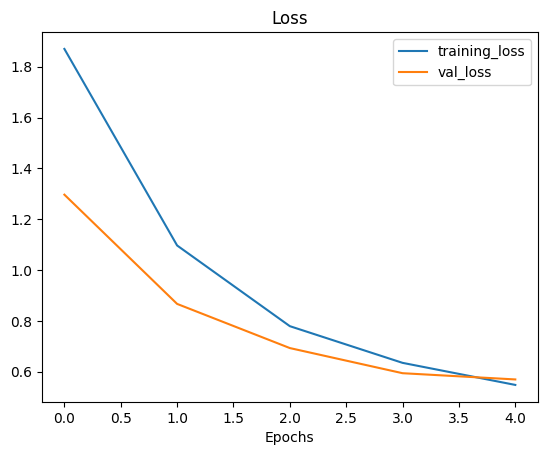

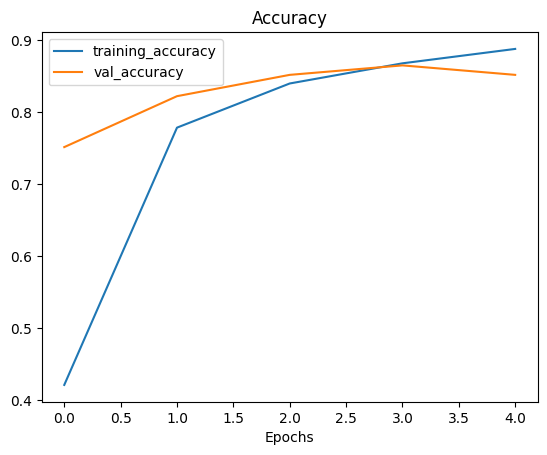

In [21]:
# Check out our model's training curves
plot_loss_curves(history_10_percent)

### Getting a feature vector from a trained model

The `tf.keras.layers.GlobalAveragePooling2D()` layer transforms a 4D tensor into a 2D tensor by averaging the values across the inner-axes.

In [23]:
# Input tensor shape
input_shape = (1, 4, 4, 3)

# Random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average layeer pooling 2d
global_avg_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

# Check the shape of the tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_avg_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [24]:
# This is the same as GlobalAveragePooling2D()
tf.reduce_mean(input_tensor, axis=[1, 2]) # average across the middle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

One of the reasons that feature extraction transfer learning is named how it is, it is because often a model outputs a **feature vector**, which can then be used to extract patterns from it.

### Running a series of transfer learning experiments

**model_1**: Use feature extraction transfer learning on 1% of the training data with data augmentation.
**model_2**: Use feature extraction transfer learning on 10% of the training data with data augmentation.
**model_3**: Use fine-tuning transfer learning on 10% of the training data with data augmentation.
**model_4**: Use fine-tuning transfer learning on 100% of the training data with data augmentation.

In [25]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2023-07-09 13:37:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4004:800::2010, 2800:3f0:4004:801::2010, 2800:3f0:4004:810::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2800:3f0:4004:800::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127,42M  20,8MB/s    in 6,7s    

2023-07-09 13:37:34 (19,0 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [26]:
# Walk through 1 percent data directory and list number of files
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'

In [27]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_percent,
    label_mode="categorical",
    batch_size=32, # default
    image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#### Adding data augmentation right into the mode

The data augmentation transformations we're going to use are:

- [RandomFlip](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip) - flips image on horizontal or vertical axis.
- [RandomRotation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomRotation) - randomly rotates image by a specified amount.
- [RandomZoom](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomZoom) - randomly zooms into an image by specified amount.
- [RandomHeight](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomHeight) - randomly shifts image height by a specified amount.
- [RandomWidth](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomWidth) - randomly shifts image width by a specified amount.
- [Rescaling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling) - normalizes the image pixel values to be between 0 and 1, this is worth mentioning because it is required for some image models but since we're using the tf.keras.applications implementation of EfficientNetB0, it's not required.

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
], name="data_augmentation")

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

(-0.5, 349.5, 495.5, -0.5)

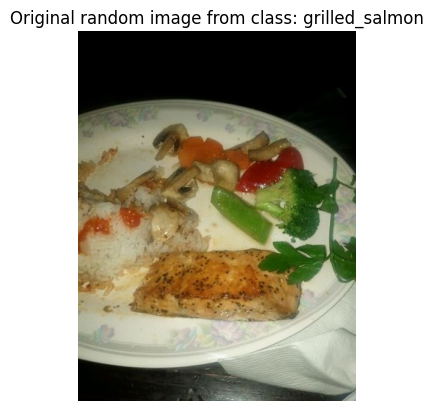

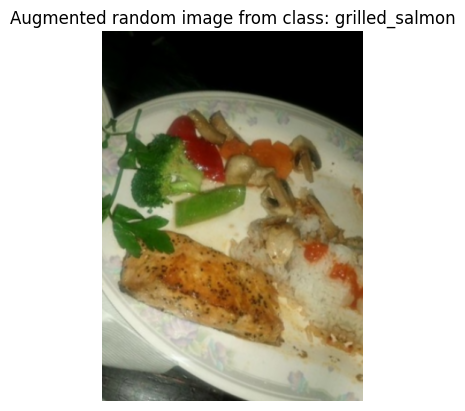

In [32]:
target_class = random.choice(train_data_1_percent.class_names)
target_dir = f"10_food_classes_1_percent/train/{target_class}"
random_image = random.choice(os.listdir(target_dir))
random_image_path = f"{target_dir}/{random_image}"
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False)

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False)

### Model 1: Feature extraction transfer learning on 1% of the data with data augmentation

In [33]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_1_percent = model_1.fit(
    train_data_1_percent,
    epochs=5,
    steps_per_epoch=len(train_data_1_percent),
    validation_data=test_data,
    validation_steps=int(0.25* len(test_data)),
    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")]
)

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230709-135022
Epoch 1/5


2023-07-09 13:50:22.712587: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [70]
	 [[{{node Placeholder/_4}}]]
2023-07-09 13:50:22.712756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [70]
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - ETA: 0s - loss: 2.3595 - accuracy: 0.1286

2023-07-09 13:50:27.181126: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2500]
	 [[{{node Placeholder/_0}}]]
2023-07-09 13:50:27.181469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2500]
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 12s 4s/step - loss: 2.3595 - accuracy: 0.1286 - val_loss: 2.2266 - val_accuracy: 0.1546
Epoch 2/5
3/3 [==============================] - 8s 4s/step - loss: 2.1010 - accuracy: 0.3000 - val_loss: 2.1163 - val_accuracy: 0.2401
Epoch 3/5
3/3 [==============================] - 8s 4s/step - loss: 1.9267 - accuracy: 0.4429 - val_loss: 1.9991 - val_accuracy: 0.3240
Epoch 4/5
3/3 [==============================] - 8s 4s/step - loss: 1.7311 - accuracy: 0.5714 - val_loss: 1.9126 - val_accuracy: 0.4211
Epoch 5/5
3/3 [==============================] - 8s 4s/step - loss: 1.5747 - accuracy: 0.6000 - val_loss: 1.8128 - val_accuracy: 0.4704


In [34]:
# Check out model summary
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [35]:
# Evaluate on the test data
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 28s 356ms/step - loss: 1.8153 - accuracy: 0.4556


[1.815322995185852, 0.45559999346733093]

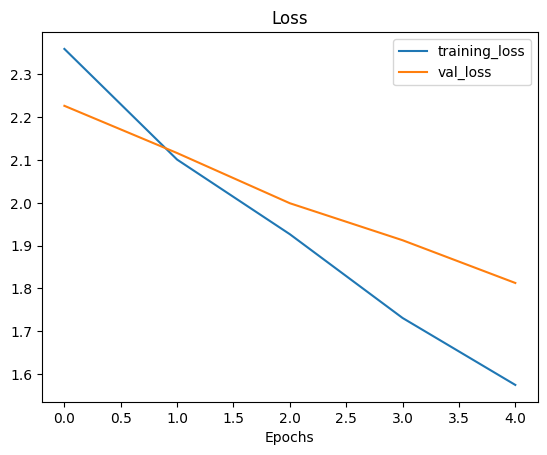

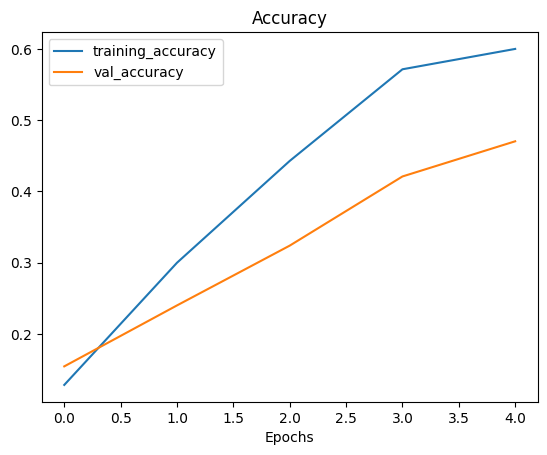

In [36]:
# How does the model go with a data augmentation layer with 1% of data
plot_loss_curves(history_1_percent)

### Model 2: Feature extraction transfer learning with 10% of data and data augmentation

In [70]:
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [71]:
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_10_percent,
    label_mode="categorical",
    image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [72]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")

input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # use Adam optimizer with base learning rate
    metrics=["accuracy"])

In [73]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True, # set to False to save the entire model
    save_best_only=True, # save only the best model weights instead of a model every epoch 
    save_freq="epoch", # save every epoch
    verbose=1
)
     

In [74]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(
    train_data_10_percent,
    epochs=initial_epochs,
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[
        create_tensorboard_callback("transfer_learning", "10_percent_data_aug"), 
        checkpoint_callback
    ]
)

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230709-154020
Epoch 1/5


2023-07-09 15:40:20.886019: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [750]
	 [[{{node Placeholder/_4}}]]
2023-07-09 15:40:20.886292: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [750]
	 [[{{node Placeholder/_0}}]]


24/24 [==============================] - ETA: 0s - loss: 1.9037 - accuracy: 0.3867

2023-07-09 15:40:32.436686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2500]
	 [[{{node Placeholder/_4}}]]
2023-07-09 15:40:32.436931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2500]
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_loss improved from inf to 1.33503, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 19s 680ms/step - loss: 1.9037 - accuracy: 0.3867 - val_loss: 1.3350 - val_accuracy: 0.7516
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2506 - accuracy: 0.7080
Epoch 2: val_loss improved from 1.33503 to 0.92129, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 15s 638ms/step - loss: 1.2506 - accuracy: 0.7080 - val_loss: 0.9213 - val_accuracy: 0.8224
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9542 - accuracy: 0.7547
Epoch 3: val_loss improved from 0.92129 to 0.74916, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 15s 651ms/step - loss: 0.9542 - accuracy: 0.7547 - val_loss: 0.7492 - val_accuracy: 0.8421
Epoch 4/5
24/24 [==============================] - ETA:

In [42]:
# Evaluate on the test data
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 28s 349ms/step - loss: 0.6144 - accuracy: 0.8516


[0.6143743395805359, 0.8515999913215637]

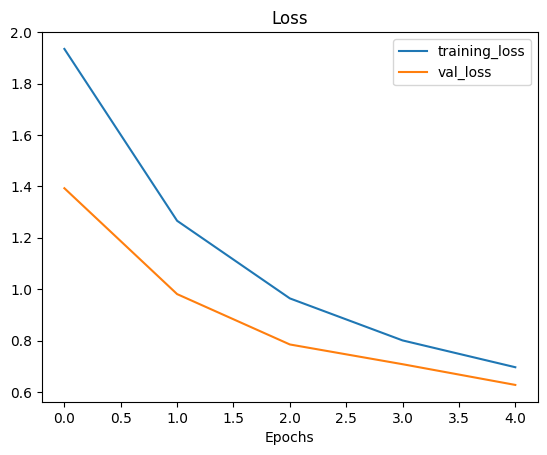

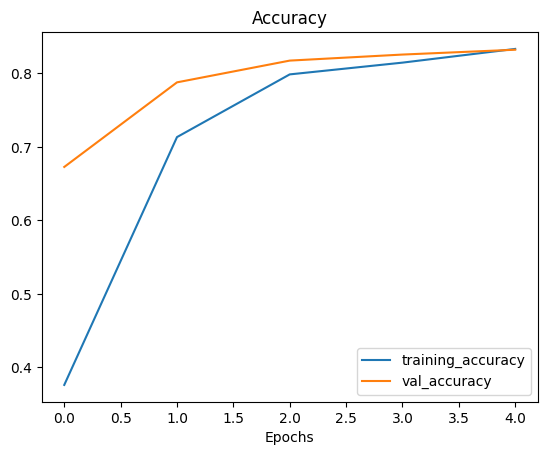

In [43]:
# Plot model loss curves
plot_loss_curves(history_10_percent_data_aug)

In [44]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 27s 337ms/step - loss: 0.6144 - accuracy: 0.8516


In [45]:
# If the results from our native model and the loaded weights are the same, this should output True
results_10_percent_data_aug == loaded_weights_model_results

False

In [46]:
import numpy as np
# Check to see if loaded model results are very close to native model results (should output True)
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [47]:
# Check the difference between the two results
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[1.1920929e-07 0.0000000e+00]


### Model 3: Fine-tuning an existing model on 10% of the data

Fine tunning unfreezing the top layers

In [48]:
# Layers in loaded model
model_2.layers

In [49]:
for layer in model_2.layers:
    print(layer.trainable)

True
True
False
True
True


In [50]:
model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [51]:
# How many layers are trainable in our base model?
print(len(model_2.layers[2].trainable_variables))

0


In [52]:
print(len(base_model.trainable_variables))

0


In [53]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_6 False
1 rescaling_10 False
2 normalization_5 False
3 rescaling_11 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

To begin fine-tuning, we'll unfreeze the entire base model by setting its trainable attribute to True. Then we'll refreeze every layer in the base model except for the last 10 by looping through them and setting their trainable attribute to False. Finally, we'll recompile the model.

In [54]:
base_model.trainable = True

# Freeze all layers except the last 10
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Recompile the modelo
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
    metrics=["accuracy"])

In [55]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable) 

0 input_6 False
1 rescaling_10 False
2 normalization_5 False
3 rescaling_11 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [56]:
print(len(model_2.trainable_variables))

12


Looks like the model has a total of 10 trainable variables, the last 10 layers of the base model and the weight and bias parameters of the Dense output layer.

The new model will be fine-tunning beginning on the last epoch of the training we already did

In [57]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(
    train_data_10_percent,
    epochs=fine_tune_epochs,
    validation_data=test_data,
    initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230709-153040
Epoch 5/10
24/24 [==============================] - 20s 705ms/step - loss: 0.6382 - accuracy: 0.8173 - val_loss: 0.5161 - val_accuracy: 0.8273
Epoch 6/10
24/24 [==============================] - 16s 655ms/step - loss: 0.5008 - accuracy: 0.8560 - val_loss: 0.4776 - val_accuracy: 0.8306
Epoch 7/10
24/24 [==============================] - 15s 658ms/step - loss: 0.4148 - accuracy: 0.8800 - val_loss: 0.4805 - val_accuracy: 0.8454
Epoch 8/10
24/24 [==============================] - 16s 665ms/step - loss: 0.3783 - accuracy: 0.8947 - val_loss: 0.4376 - val_accuracy: 0.8618
Epoch 9/10
24/24 [==============================] - 17s 709ms/step - loss: 0.3288 - accuracy: 0.9013 - val_loss: 0.4237 - val_accuracy: 0.8602
Epoch 10/10
24/24 [==============================] - 19s 787ms/step - loss: 0.3016 - accuracy: 0.9160 - val_loss: 0.4601 - val_accuracy: 0.8405


In [58]:
# Evaluate the model on the test data
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 31s 388ms/step - loss: 0.4439 - accuracy: 0.8588


In [59]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.37599998712539673, 0.7133333086967468, 0.7986666560173035, 0.8146666884422302, 0.8333333134651184, 0.8173333406448364, 0.8560000061988831, 0.8799999952316284, 0.8946666717529297, 0.9013333320617676, 0.9160000085830688]


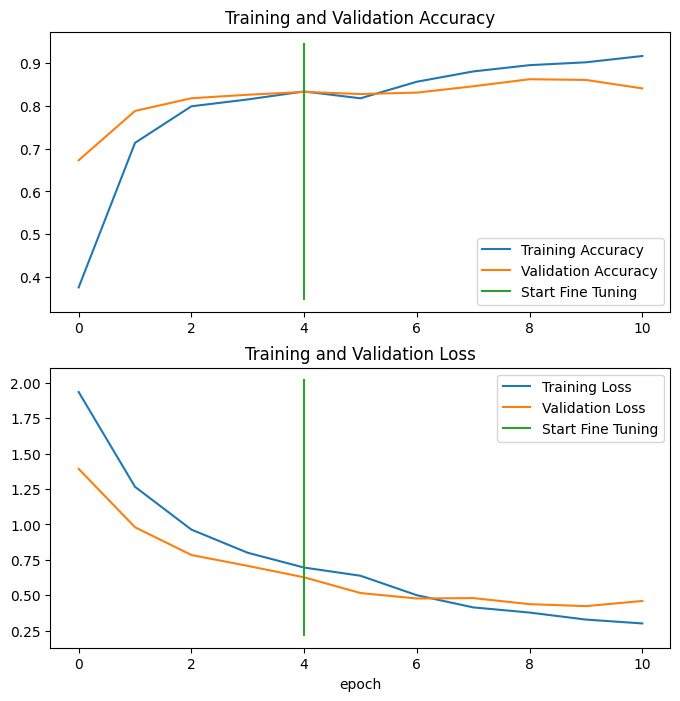

In [60]:
compare_historys(
    original_history=history_10_percent_data_aug, 
    new_history=history_fine_10_percent_data_aug, 
    initial_epochs=5)

### Model 4: Fine-tuning an existing model all of the data

In [61]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2023-07-09 15:35:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2800:3f0:4004:804::2010, 2800:3f0:4004:801::2010, 2800:3f0:4004:805::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2800:3f0:4004:804::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495,13M  22,0MB/s    in 24s     

2023-07-09 15:35:48 (20,8 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [62]:
# How many images are we working with now?
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [64]:
# Setup data inputs
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [65]:
# Evaluate model (this is the fine-tuned 10 percent of data version)
model_2.evaluate(test_data)

2023-07-09 15:36:03.658308: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2500]
	 [[{{node Placeholder/_0}}]]
2023-07-09 15:36:03.658546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2500]
	 [[{{node Placeholder/_4}}]]


79/79 [==============================] - 28s 359ms/step - loss: 0.4439 - accuracy: 0.8588


[0.4438995122909546, 0.8587999939918518]

In [66]:
results_fine_tune_10_percent

[0.44389957189559937, 0.8587999939918518]

In [67]:
model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 906,042
Non-train

In [75]:
# Load model from checkpoint, that way we can fine-tune from the same stage the 10 percent data model was fine-tuned from
checkpoint_dir = "ten_percent_model_checkpoints_weights"
latest_weights = tf.train.latest_checkpoint(checkpoint_dir)

# Had to install protobuff 3.20.3 to make this work
model_2.load_weights(latest_weights) # revert model back to saved weights

In [76]:
# After loading the weights, this should have gone down (no fine-tuning)
model_2.evaluate(test_data)

79/79 [==============================] - 30s 374ms/step - loss: 0.6107 - accuracy: 0.8432


[0.6106848120689392, 0.8432000279426575]

In [77]:
# Check to see if the above two results are the same (they should be)
results_10_percent_data_aug

[0.6143743395805359, 0.8515999913215637]

In [78]:
# Check which layers are tuneable in the whole model
for layer_number, layer in enumerate(model_2.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 False
3 global_average_pooling_layer True
4 output_layer True


In [79]:
# Check which layers are tuneable in the base model
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_7 False
1 rescaling_12 False
2 normalization_6 False
3 rescaling_13 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [80]:
# Compile
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # divide learning rate by 10 for fine-tuning
    metrics=["accuracy"])

In [81]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(
    train_data_10_classes_full,
    epochs=fine_tune_epochs,
    initial_epoch=history_10_percent_data_aug.epoch[-1],
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230709-154332
Epoch 5/10


2023-07-09 15:43:32.860467: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [7500]
	 [[{{node Placeholder/_0}}]]
2023-07-09 15:43:32.860748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [7500]
	 [[{{node Placeholder/_0}}]]


235/235 [==============================] - 99s 407ms/step - loss: 0.8129 - accuracy: 0.7616 - val_loss: 0.5385 - val_accuracy: 0.8553
Epoch 6/10
235/235 [==============================] - 107s 453ms/step - loss: 0.7504 - accuracy: 0.7809 - val_loss: 0.4952 - val_accuracy: 0.8602
Epoch 7/10
235/235 [==============================] - 100s 425ms/step - loss: 0.7137 - accuracy: 0.7896 - val_loss: 0.4500 - val_accuracy: 0.8766
Epoch 8/10
235/235 [==============================] - 99s 420ms/step - loss: 0.6836 - accuracy: 0.7937 - val_loss: 0.4262 - val_accuracy: 0.8766
Epoch 9/10
235/235 [==============================] - 97s 413ms/step - loss: 0.6671 - accuracy: 0.7984 - val_loss: 0.4019 - val_accuracy: 0.8783
Epoch 10/10
235/235 [==============================] - 104s 443ms/step - loss: 0.6446 - accuracy: 0.8049 - val_loss: 0.4236 - val_accuracy: 0.8750


In [82]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 30s 375ms/step - loss: 0.4233 - accuracy: 0.8792


[0.42328593134880066, 0.8791999816894531]

5
11
[0.3866666555404663, 0.7080000042915344, 0.7546666860580444, 0.7960000038146973, 0.8226666450500488, 0.7616000175476074, 0.7809333205223083, 0.7896000146865845, 0.7937333583831787, 0.7983999848365784, 0.8049333095550537]


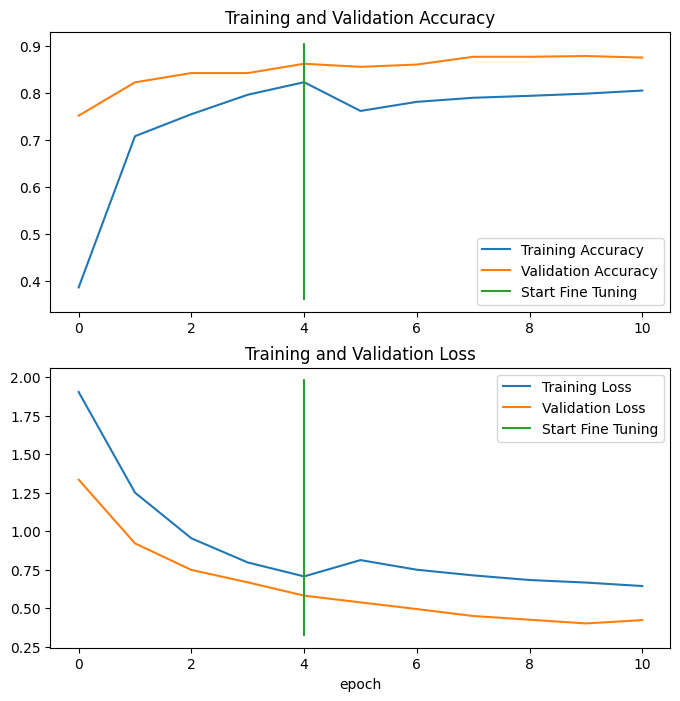

In [83]:
compare_historys(
    original_history=history_10_percent_data_aug,
    new_history=history_fine_10_classes_full,
    initial_epochs=5)

### Viewing our experiment data on TensorBoard

In [84]:
!tensorboard dev upload --logdir ./transfer_learning \
   --name "Transfer learning experiments" \
   --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
   --one_shot

2023-07-09 15:54:08.941528: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-09 15:54:09.582582: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/E97cXpydT3aQNSo3em3tqw/

[2023-07-09T15:54:11] Started scanning logdir.
[2023-07-09T15:54:18] Total uploaded: 162 scalars, 0 tensors, 5 binary objects (4.3 MB)
[2023-07-09T15:54:18] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/E97cXpydT3aQNSo3em3tqw/


In [85]:
!tensorboard dev list

2023-07-09 15:59:05.917641: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-09 15:59:06.594063: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
https://tensorboard.dev/experiment/E97cXpydT3aQNSo3em3tqw/
	Name                 Transfer learning experiments
	Description          A series of different transfer learning experiments with varying amounts of data and fine-tuning
	Id                   E97cXpydT3aQNSo3em3tqw
	Created              2023-07-09 15:54:11 (4 minutes ago)
	Updated              2023-07-09 15:54:18 (4 minutes ago)
	Runs                 10
	Tags                 5
	Scalars              162
	Tensor bytes   

In [86]:
!tensorboard dev delete --experiment_id E97cXpydT3aQNSo3em3tqw

2023-07-09 16:00:02.143683: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-09 16:00:02.800501: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
Deleted experiment E97cXpydT3aQNSo3em3tqw.
